## Overview

The idea is to develop a customer segmentation for marketing strategy.

The dataset contains the usage behaviour of about 8500+ active credit card holder over a 6 month period on the basis of 18 behavioral variable.

[Dataset Overview](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [ ]:
data=pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Checking for missing values

In [ ]:
pd.DataFrame({"% Missing":np.mean(data.isnull())*100}) 

,% Missing
CUST_ID,0.000000
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


> Since the Percentage of missing value is very low the columns can be dropped or imputed by any values.

In [ ]:
data.dropna(inplace=True)

Dropping the unwanted columns.

In [ ]:
data.drop("CUST_ID",axis=1,inplace=True)

### Dendogram

A dendrogram is a diagram that shows the hierarchical relationship between objects.

In [ ]:
import scipy.cluster.hierarchy as sch

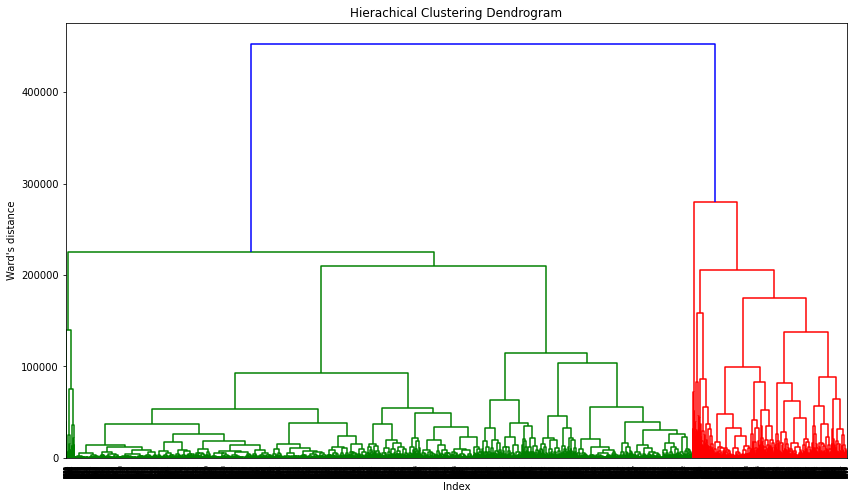

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendogram=sch.dendrogram(sch.linkage(data,method="ward"))

### Clustering using K-Means 

#### Determinig K using Elbow Method

In [ ]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=5)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


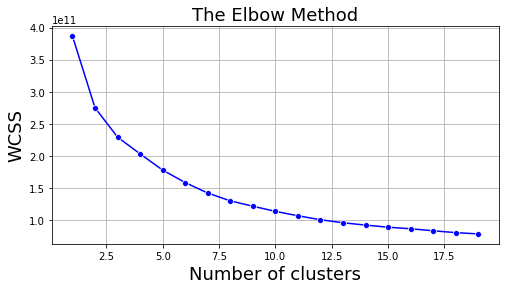

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(range(1,20),wcss,marker='o',color='blue')
plt.title("The Elbow Method",size=18)
plt.xlabel("Number of clusters",size=18)
plt.ylabel("WCSS",size=18)
plt.grid()
plt.show()

From the above graph we can conclude that the value of k can be 7 or 8 as the **elbow** i.e the point after which inertia starts decreasing is linear. 

#### Validating K using Silhouette

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sc=[]

for i in range(2,20):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=5)
  kmeans.fit(data)
  sc.append([i,silhouette_score(data,kmeans.labels_)])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


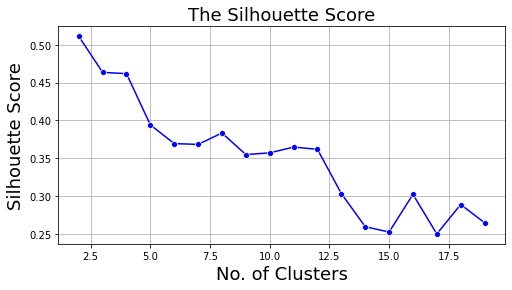

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(pd.DataFrame(sc)[0],pd.DataFrame(sc)[1],marker='o',color='blue')
plt.title("The Silhouette Score",size=18)
plt.xlabel("No. of Clusters",size=18)
plt.ylabel("Silhouette Score",size=18)
plt.grid()
plt.show()

Thus selecting the number of clusters k=8 based on Silhouette.

In [ ]:
# Fitting K-Means to Dataset

kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [ ]:
print(y_kmeans)

[1 6 0 ... 1 1 1]


In [66]:
data['Cluster']=y_kmeans

In [68]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')

#### Customers Per Cluster

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


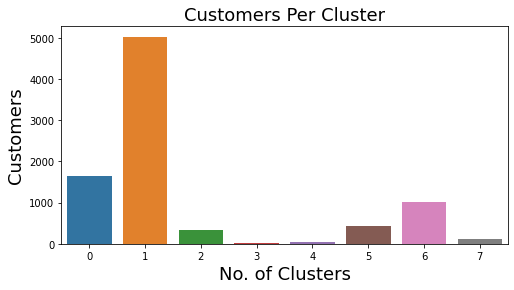

In [73]:
plt.figure(figsize=(8,4))
sns.countplot(data.Cluster)
plt.title("Customers Per Cluster",size=18)
plt.xlabel("No. of Clusters",size=18)
plt.ylabel("Customers",size=18)
plt.show()

#### Average Records Per Cluster

In [125]:
data_col=list(data.columns[0:-1])
data.groupby('Cluster')[data_col].mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,906.257454,0.885058,1231.492173,714.325800,517.396276,223.460487,0.629821,0.336818,0.438281,0.049911,0.933011,19.404345,7058.048499,1468.123175,347.251405,0.246011,11.810501
1,805.375419,0.874375,513.717966,249.586239,264.446555,444.034349,0.457702,0.133119,0.351449,0.109278,2.224080,9.622687,2117.181537,895.003141,529.705155,0.150766,11.394229
2,2396.226005,0.973313,6665.054080,4488.250245,2178.644325,530.020601,0.914682,0.704536,0.713376,0.070622,1.911043,75.239264,8117.024540,6583.340137,1209.115559,0.324751,11.932515
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
4,4438.237601,0.985258,1194.728378,172.967838,1021.760541,1024.245606,0.512899,0.050368,0.483006,0.086814,2.972973,23.027027,4652.702703,1534.813466,27711.273916,0.000000,11.918919
5,5836.923585,0.957004,1605.074220,978.008119,627.219656,2186.051843,0.559353,0.331372,0.401008,0.227010,5.688073,23.188073,13517.775229,2656.663811,1857.154248,0.108735,11.871560
6,3995.258965,0.958032,501.124479,274.606601,226.551984,3488.276287,0.311694,0.130898,0.215471,0.366392,10.060904,8.634578,6291.998571,2685.287015,1652.534473,0.028296,11.465619
7,5234.497152,0.885738,1443.694649,845.968772,597.918860,10938.359442,0.357262,0.196234,0.280227,0.503599,21.061404,18.342105,10810.964912,15327.022689,2092.402035,0.145335,11.684211


### Credit_Limit vs Purchase vs Balance 

In [162]:
px.scatter_3d(data, x="BALANCE", y="PURCHASES_FREQUENCY", z="CREDIT_LIMIT",color="Cluster")

### The idea was to segment the customer for marketers to create new marketing strategies.

Here we can observe, 

* The Customers with less purchase history and less balance are the one with less credit limit. The largest group of people exist in this segment.

* The Customers with high balance and high Purchase Frequency are likely to have good credit limit. The group of people in these segment are very low as compare to other segments

Similary many inferences can be drawn out with other variables.
